# Assignment2 anomaly detection dataset + SVM
1.  
Assignment2 는 제가 anomaly detection 데이터셋 캐글에 올라와있는 것을 드립니다.   
이것은 해당 결제가 사기인지 아닌 지 판별하는 데이터셋이며, 실습코드를 활용하고, 또 본인이 여태 배운 내용을 활용하여   
자유롭게 데이터를 가지고 연습해주시면 됩니다.  
 
2.  
다만 이 데이터셋은 굉장히 imbalance한 데이터 셋입니다.   
실제 사기를 치는 사례가 많지 않으므로 사기인 경우가 전체에 0.17 프로밖에 되지 않습니다.   
따라서, 그냥 데이터를 트레이닝 시키면 무조건 사기가 아니라고 판별해버릴 가능성이 높습니다.   
또한, 그대로 트레이닝을 돌리게 되면 엄청나게 많은 데이터 양 때문에 트레이닝조차 힘들 것입니다.   
그런데 실제로 이런 데이터에 대해 트레이닝을 하는 여러 방법들이 있으니 고민해보세요.  


- 데이터 분포 : True : 0.17프로 나머지 다 False, 
- Row약 28만행 < 데이터 트레인 시간이 오래걸립니다. (그래도 자고 일어나면 트레이닝 돼있기는 하는 정도입니다)
- 여러가지 방법을 사용해서 트레이닝 해보고 결과를 비교해주면됩니다!
- 시간이 없거나 좀 어렵다 하시는 분들은 멘토에게 물어보고 한 가지 방법으로만 구현해도 됩니다.

**앞의 EDA부분은 https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets 를 참고하였습니다**

---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Anomaly detection(사기감지 데이터) 로드
data = pd.read_csv('anomaly-detection/creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284806, 31)

In [5]:
# 결측치 하나도 X
data.isnull().sum().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
Time      284806 non-null float64
V1        284806 non-null float64
V2        284806 non-null float64
V3        284806 non-null float64
V4        284806 non-null float64
V5        284806 non-null float64
V6        284806 non-null float64
V7        284806 non-null float64
V8        284806 non-null float64
V9        284806 non-null float64
V10       284806 non-null float64
V11       284806 non-null float64
V12       284806 non-null float64
V13       284806 non-null float64
V14       284806 non-null float64
V15       284806 non-null float64
V16       284806 non-null float64
V17       284806 non-null float64
V18       284806 non-null float64
V19       284806 non-null float64
V20       284806 non-null float64
V21       284806 non-null float64
V22       284806 non-null float64
V23       284806 non-null float64
V24       284806 non-null float64
V25       284806 non-null float64
V26  

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405007e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [169]:
p1, p2 = data['Class'].value_counts()/data.shape[0]

print(f'No Frauds\t {round(p1*100, 3)} %')
print(f'Frauds \t\t {round(p2*100, 3)} %')

No Frauds	 99.827 %
Frauds 		 0.173 %


Text(0.5, 1.0, 'Class distributions (0:No fraud, 1:Fraud)')

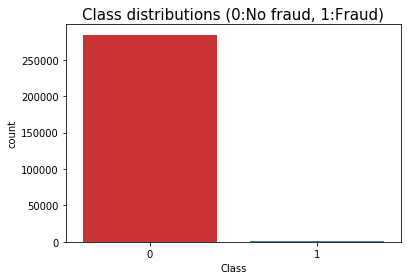

In [170]:
sns.countplot(data['Class'], palette='Set1')
plt.title('Class distributions (0:No fraud, 1:Fraud)', fontsize=15)

(0.0, 172788.0)

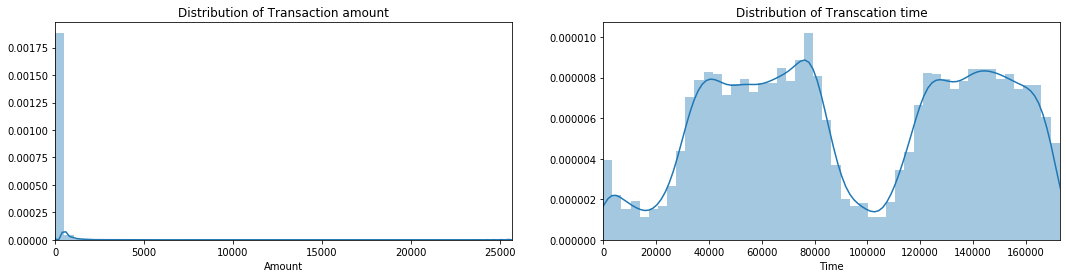

In [171]:
amount = data['Amount']
time   = data['Time']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 4))

sns.distplot(amount, ax=axes[0])
axes[0].set_title('Distribution of Transaction amount')
axes[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=axes[1])
axes[1].set_title('Distribution of Transcation time')
axes[1].set_xlim([min(time), max(time)])

In [10]:
X = data.drop('Class', axis=1)
y = data['Class']

In [11]:
from imblearn.under_sampling import *

Using TensorFlow backend.


### Random Under Sapling

In [172]:
from imblearn.under_sampling import RandomUnderSampler

random_undersampling = RandomUnderSampler()
X_random, y_random = random_undersampling.fit_sample(X, y)

new_df = pd.concat([X_random, y_random], axis=1)
new_df = new_df.sample(frac=1)

In [173]:
p1, p2 = new_df['Class'].value_counts()/new_df.shape[0]

print(f'No Frauds\t {round(p1*100, 3)} %')
print(f'Frauds \t\t {round(p2*100, 3)} %')

No Frauds	 50.0 %
Frauds 		 50.0 %


Text(0.5, 1.0, 'Class distributions (0:No fraud, 1:Fraud)')

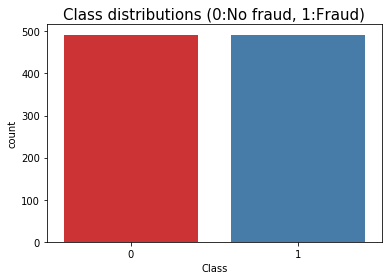

In [174]:
sns.countplot(new_df['Class'], palette='Set1')
plt.title('Class distributions (0:No fraud, 1:Fraud)', fontsize=15)

In [176]:
new_df.corr()['Class'].sort_values().head()

V14   -0.752221
V12   -0.686340
V10   -0.624894
V16   -0.595228
V3    -0.570759
Name: Class, dtype: float64

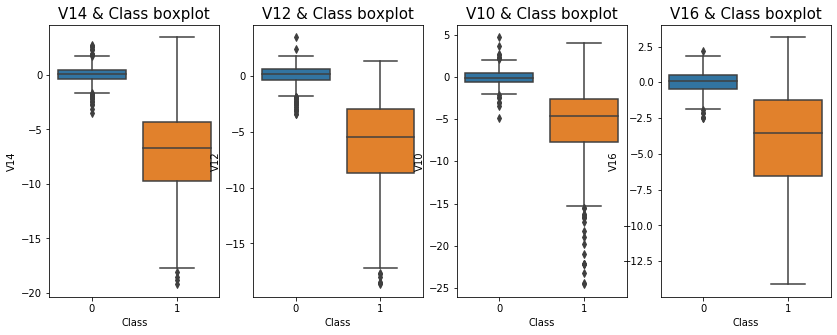

In [177]:
# 음의 상관계수 높은 상위 4개의 feature 뽑아서 boxplot 그려보았다.

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 5))

negative_correlations = ['V14', 'V12', 'V10', 'V16']

for i, col in enumerate(negative_correlations):
    sns.boxplot(x='Class', y=col, data=new_df, ax=axes[i])
    axes[i].set_title(f'{col} & Class boxplot', fontsize=15)

In [178]:
new_df.corr()['Class'].sort_values(ascending=False).head()

Class    1.000000
V4       0.710523
V11      0.682388
V2       0.490983
V19      0.257643
Name: Class, dtype: float64

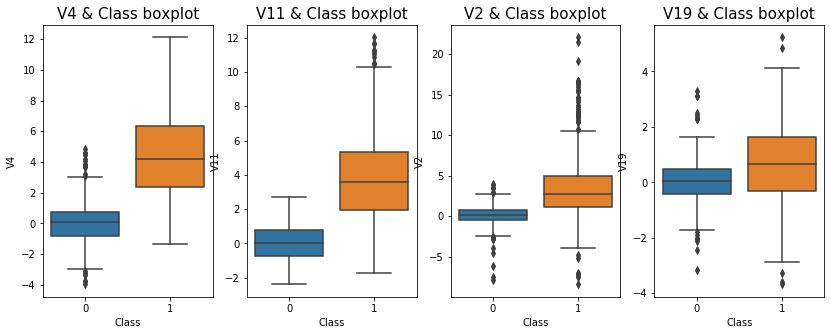

In [179]:
# 양의 상관관계 높은 상위 4개의 feature 뽑아서 boxplot 그려보았다

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 5))

positive_correlations = ['V4', 'V11', 'V2', 'V19']

for i, col in enumerate(positive_correlations):
    sns.boxplot(x='Class', y=col, data=new_df, ax=axes[i])
    axes[i].set_title(f'{col} & Class boxplot', fontsize=15)

### Condensed Nearest Neighbour
https://datascienceschool.net/view-notebook/c1a8dad913f74811ae8eef5d3bedc0c3/
CNN(Condensed Nearest Neighbour) 방법은 1-NN 모형으로 분류되지 않는 데이터만 남기는 방법이다. 선택된 데이터 집합을  S 라고 하자.

소수 클래스 데이터를 모두  S 에 포함시킨다.
다수 데이터 중에서 하나를 골라서 가장 가까운 데이터가 다수 클래스이면 포함시키지 않고 아니면  S 에 포함시킨다.
더이상 선택되는 데이터가 없을 때까지 2를 반복한다.
이 방법을 사용하면 **기존에 선택된 데이터와 가까이 있으면서 같은 클래스인 데이터는 선택되지 않기 때문에** 다수 데이터의 경우 선택되는 비율이 적어진다.

In [14]:
# 시간으로 포기
# cnn = CondensedNearestNeighbour()
# X_cnn, y_cnn = cnn.fit_sample(X, y)

### Tomek’s link method¶
토멕링크(Tomek’s link)란 서로 다른 클래스에 속하는 한 쌍의 데이터  (x+,x−) 로 서로에게 더 가까운 다른 데이터가 존재하지 않는 것이다. 즉 **클래스가 다른 두 데이터가 아주 가까이 붙어있으면 토멕링크**가 된다. 토멕링크 방법은 이러한 **토멕링크**를 찾은 다음 그 중에서 다수 클래스에 속하는 데이터를 **제외**하는 방법으로 경계선을 다수 클래스쪽으로 밀어붙이는 효과가 있다.

In [104]:
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_sample(X, y)
y_tomek = pd.DataFrame(y_tomek)

# label은 다른데 비슷한 데이터인 경우에는 성능향상에 도움을 줄 수 있겠으나,
# 우리 데이터셋은 label의 분포가 극도로 imbalance하기 때문에 이 방법은 성능향상에 크게 도움을 주지 못하였다.
# (실제 이 데이터로 모델을 돌려본 결과 원래 데이터와 성능차이가 크게 나지 않았다)
# (label의 분포를 맞춰주는 random under sampling 방식이 성능 향상에 크게 기여하였다.)

In [122]:
print(X_tomek.shape)
print(y_tomek.shape)

(284735, 30)
(284735, 1)


In [124]:
X_tomek.to_csv('tomek_X.csv', index=False)
y_tomek.to_csv('tomek_y.csv', index=False)

In [132]:
# 실행해서 저장해 놓았던 결과 불러오기
X_tomek = pd.read_csv('tomek_X.csv')
y_tomek = pd.read_csv('tomek_y.csv')
y_tomek = pd.Series(y_tomek['Class'])

In [182]:
p1, p2 = y_tomek.value_counts()/y_tomek.shape[0]

print(f'No Frauds\t {round(p1*100, 3)} %')
print(f'Frauds \t\t {round(p2*100, 3)} %')

No Frauds	 99.827 %
Frauds 		 0.173 %


Text(0.5, 1.0, 'Class distributions (0:No fraud, 1:Fraud)')

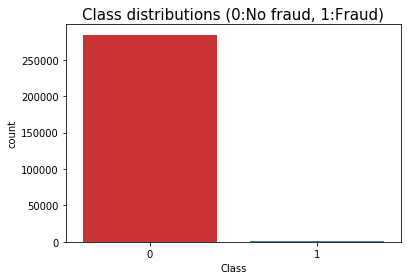

In [183]:
sns.countplot(y_tomek, palette='Set1')
plt.title('Class distributions (0:No fraud, 1:Fraud)', fontsize=15)

### Edited Nearest Neighbours
ENN(Edited Nearest Neighbours) 방법은 다수 클래스 데이터 중 가장 가까운 k(`n_neighbors`)개의 데이터가 모두(`kind_sel="all"`) 또는 다수(`kind_sel="mode"`) 다수 클래스가 아니면 삭제하는 방법이다. 소수 클래스 주변의 다수 클래스 데이터는 사라진다.

---

Text(0.5, 1, 'Under random sampling Correlation Matrix')

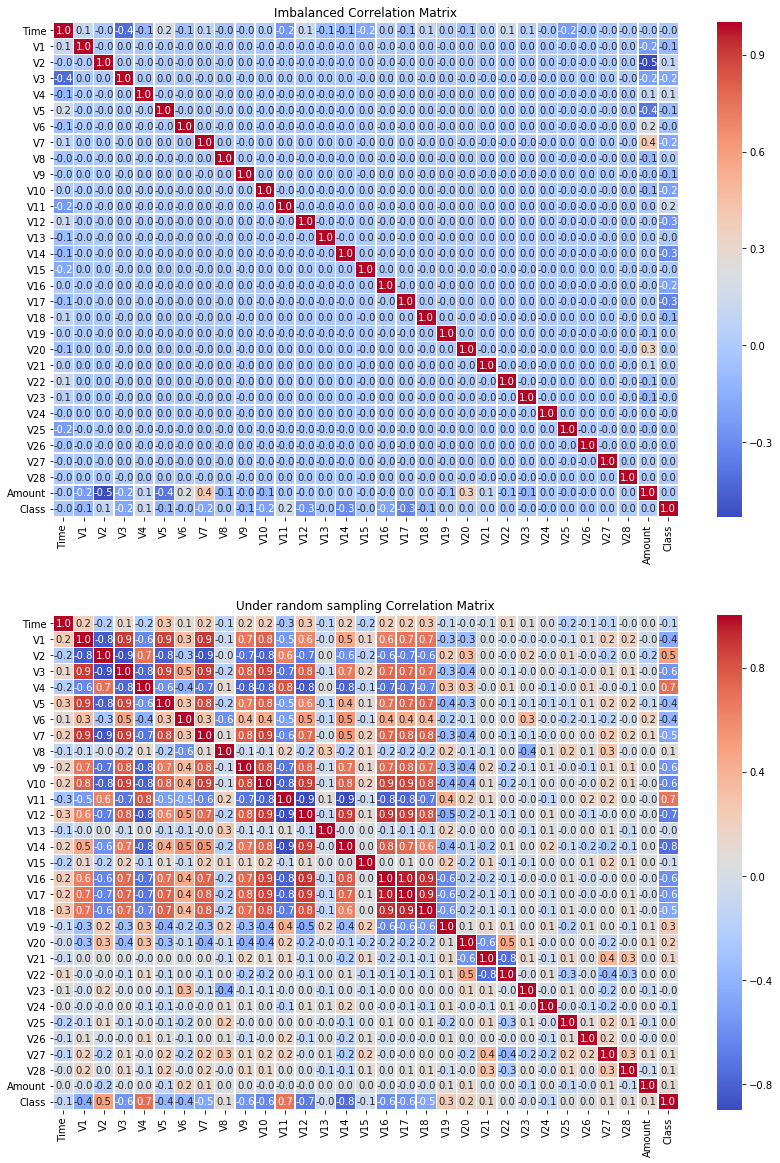

In [175]:
# 상관계수 확인
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 20))

sns.heatmap(data.corr(), cmap='coolwarm', annot=True, fmt='.1f', ax=axes[0], linewidths=0.5)
axes[0].set_title('Imbalanced Correlation Matrix')

sns.heatmap(new_df.corr(), cmap='coolwarm', annot=True, fmt='.1f', ax=axes[1],  linewidths=0.5)
axes[1].set_title('Under random sampling Correlation Matrix')

## LogisticRegression (Scaling X + under sampling(random))

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [145]:
def evaluation(y_true, y_pred, y_pred_proba = [None]):
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    recall = round(recall_score(y_true, y_pred), 3)
    precison = round(precision_score(y_true, y_pred), 3)
    f1score = round(f1_score(y_true, y_pred), 3)
    
    
    print(confusion_matrix(y_true, y_pred), '\n')
    print(f'acc: {accuracy}, recall: {recall}, precision: {precison}')
    print(f'f1 score  = {f1score}')
    
    if y_pred_proba[0] != None:
        auc = round(roc_auc_score(y_true, y_pred_proba), 3)
        print(f'auc score = {auc}')

In [37]:
# 위는 major label의 데이터 중 minor label의 데이터만큼 random sampling해서 X_random, y_random 데이터셋을 만들고 학습하였다.
# 아래는 sampling하지 않고 원본 데이터 그대로 학습하였다.
# test 데이터의 여러 평가지표를 확인해본 결과 random sampling해서 label의 분포를 balance하게 만든 뒤 학습시킨 경우가 예측 성능이 훨씬 좋았다.
# 아래의 경우 accuracy는 매우 높았지만, 다른 평가지표는 매우 낮다. 
# (아무래도 target이 0인 데이터가 압도적으로 많으니 대부분의 경우를 0으로 예측하였고, 따라서 recall, precision이 낮은 문제가 발생한 것 같다.)

# under sampling 수행 (random 방식)
X_random_train, X_random_test, y_random_train, y_random_test = train_test_split(X_random, y_random, random_state=46)
lr_clf = LogisticRegression()
lr_clf.fit(X_random_train, y_random_train)
pred = lr_clf.predict(X_random_test)
pred_proba = lr_clf.predict_proba(X_random_test)[:, 1]
evaluation(y_random_test, pred, pred_proba)

print('='*50)

# original data로 수행
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=46)
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
evaluation(y_test, pred, pred_proba)

[[112   5]
 [  6 123]] 

acc: 0.955, recall: 0.953, precision: 0.961
f1 score  = 0.957
auc score = 0.983
[[71033    40]
 [   42    87]] 

acc: 0.999, recall: 0.674, precision: 0.685
f1 score  = 0.68
auc score = 0.922


In [38]:
# 위에서 under sampling(random)을 수행한 경우에 결과가 좋았으므로
# under sampling(random) 데이터를 이용해 hyperparameter tuning을 실행해보도록 하자.

# logisticRegression에서 C는 정규화의 정도의 역수이다. 즉, C가 작을수록 정규화의 정도가 큰 것이다.
# 정규화의 방법 l1, l2 + 정규화의 정도(C)에 대해 hyperparameter tuning을 진행해보았다.

params = {
    'penalty':['l1', 'l2'],
    'C':[0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 75, 100],
}

# 본 문제는 사기를 정확히 예측하는 것이 목적이므로, 평가척도는 recall을 사용하도록 하겠다.
lr_clf = LogisticRegression(solver='liblinear')
grid_cv = GridSearchCV(lr_clf, params, cv=5, scoring='recall')
grid_cv.fit(X_random_train, y_random_train)

print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9091324200913242
{'C': 40, 'penalty': 'l1'}


In [39]:
pd.DataFrame(grid_cv.cv_results_)[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)[:10]

,params,mean_test_score
32,"{'C': 40, 'penalty': 'l1'}",0.909132
34,"{'C': 50, 'penalty': 'l1'}",0.909132
36,"{'C': 75, 'penalty': 'l1'}",0.909094
14,"{'C': 4, 'penalty': 'l1'}",0.906355
10,"{'C': 2, 'penalty': 'l1'}",0.903615
12,"{'C': 3, 'penalty': 'l1'}",0.903615
20,"{'C': 7, 'penalty': 'l1'}",0.903577
28,"{'C': 20, 'penalty': 'l1'}",0.903577
24,"{'C': 9, 'penalty': 'l1'}",0.903577
22,"{'C': 8, 'penalty': 'l1'}",0.903577


In [40]:
from sklearn.model_selection import cross_val_score

# 규제를 적용하지 않은 로지스틱 회귀
lr_clf = LogisticRegression()
print( cross_val_score(lr_clf, X_random_train, y_random_train, cv=5, scoring='recall').mean() )

0.8926179604261796


In [43]:
# 규제를 적용하지 않았을 때 보다 l1 규제, C=40일 때 recall score가 높았다.
# 이 근처의 값에서 좀 더 세밀하게 hyperparameter tuning을 진행해보도록 하겠다.

params = {
    'C':list(np.arange(30, 60, 1))
}

lr_clf = LogisticRegression(penalty='l1', solver='liblinear')
grid_cv = GridSearchCV(lr_clf, params, cv=5, scoring='recall')
grid_cv.fit(X_random_train, y_random_train)

print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9118721461187214
{'C': 51}


In [44]:
pd.DataFrame(grid_cv.cv_results_)[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)[:10]

,params,mean_test_score
25,{'C': 55},0.911872
21,{'C': 51},0.911872
0,{'C': 30},0.909132
2,{'C': 32},0.909132
3,{'C': 33},0.909132
27,{'C': 57},0.909132
5,{'C': 35},0.909132
8,{'C': 38},0.909132
20,{'C': 50},0.909132
26,{'C': 56},0.909094


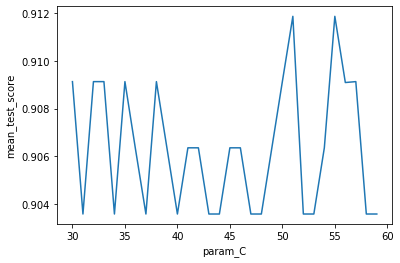

In [62]:
# C가 55 혹은 51일 때 recall score가 0.912 정도로 높았다.
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(grid_cv.cv_results_))

In [63]:
# scaling X + 로지스틱 + 규제 적용 (l1규제, C=55)
lr_clf = LogisticRegression(penalty='l1', solver='liblinear', C=55)
lr_clf.fit(X_random_train, y_random_train)
pred = lr_clf.predict(X_random_test)
pred_proba = lr_clf.predict_proba(X_random_test)[:, 1]
evaluation(y_random_test, pred, pred_proba)

[[113   4]
 [  6 123]] 

acc: 0.959, recall: 0.953, precision: 0.969
f1 score  = 0.961
auc score = 0.981


## LogisticRegression (Scaling O + under sampling(random))

In [64]:
# standard scaling(표준화) 적용
standard_scaler = StandardScaler()
standard_scaler.fit(X_random_train)
X_random_scaled_train = standard_scaler.transform(X_random_train)
X_random_scaled_test  = standard_scaler.transform(X_random_test)

In [65]:
lr_clf = LogisticRegression()
lr_clf.fit(X_random_scaled_train, y_random_train)
pred = lr_clf.predict(X_random_scaled_test)
pred_proba = lr_clf.predict_proba(X_random_scaled_test)[:, 1]
evaluation(y_random_test, pred, pred_proba)

# 표준화 가기 전 (original data)
# acc: 0.955, recall: 0.953, precision: 0.961
# f1 score  = 0.957
# auc score = 0.983

[[113   4]
 [  8 121]] 

acc: 0.951, recall: 0.938, precision: 0.968
f1 score  = 0.953
auc score = 0.987


In [76]:
params = {
    'penalty':['l1', 'l2'],
    'C':[0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 75, 100],
}

lr_clf = LogisticRegression(solver='liblinear')
grid_cv = GridSearchCV(lr_clf, params, cv=5, scoring='recall')
grid_cv.fit(X_random_scaled_train, y_random_train)

print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9036149162861491
{'C': 10, 'penalty': 'l1'}


In [77]:
lr_clf = LogisticRegression()
print( cross_val_score(lr_clf, X_random_train, y_random_train, cv=5, scoring='recall').mean() )

# 규제를 적용했을 때 recall score가 더 높았다.
# 10~100 근처의 값에서 좀 더 hyperparameter를 tuning해보도록 하겠다.

0.8926179604261796


In [78]:
pd.DataFrame(grid_cv.cv_results_)[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)[:10]

,params,mean_test_score
26,"{'C': 10, 'penalty': 'l1'}",0.903615
39,"{'C': 100, 'penalty': 'l2'}",0.903577
38,"{'C': 100, 'penalty': 'l1'}",0.903577
36,"{'C': 75, 'penalty': 'l1'}",0.903577
34,"{'C': 50, 'penalty': 'l1'}",0.903577
32,"{'C': 40, 'penalty': 'l1'}",0.903577
30,"{'C': 30, 'penalty': 'l1'}",0.903577
28,"{'C': 20, 'penalty': 'l1'}",0.903577
37,"{'C': 75, 'penalty': 'l2'}",0.900837
14,"{'C': 4, 'penalty': 'l1'}",0.898135


In [82]:
params = {
    'C':list(np.arange(5, 100, 1))
}

lr_clf = LogisticRegression(penalty='l1', solver='liblinear')
grid_cv = GridSearchCV(lr_clf, params, cv=5, scoring='recall')
grid_cv.fit(X_random_train, y_random_train)

print(grid_cv.best_score_)
print(grid_cv.best_params_)

0.9146118721461187
{'C': 47}


In [83]:
pd.DataFrame(grid_cv.cv_results_)[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)[:10]

,params,mean_test_score
42,{'C': 47},0.914612
26,{'C': 31},0.911872
31,{'C': 36},0.911872
39,{'C': 44},0.911872
23,{'C': 28},0.909132
32,{'C': 37},0.909132
58,{'C': 63},0.909132
35,{'C': 40},0.909132
76,{'C': 81},0.909132
28,{'C': 33},0.909132


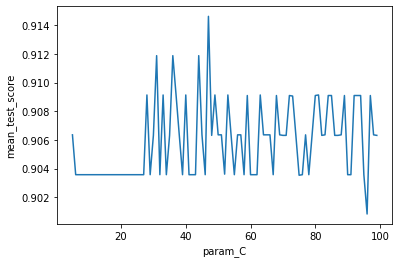

In [84]:
# C가 47일 때 recall score가 0.911 정도로 가장 높았다.
sns.lineplot(x='param_C', y='mean_test_score', data=pd.DataFrame(grid_cv.cv_results_))

In [85]:
# scaling 0 + 로지스틱 + 규제 적용 (l1규제, C=47)

lr_clf = LogisticRegression(penalty='l1', C=47, solver='liblinear')
lr_clf.fit(X_random_scaled_train, y_random_train)
pred = lr_clf.predict(X_random_scaled_test)
pred_proba = lr_clf.predict_proba(X_random_scaled_test)[:, 1]
evaluation(y_random_test, pred, pred_proba)

# scaling X + 로지스틱 + 규제 적용 (l1규제, C=55)
# acc: 0.959, recall: 0.953, precision: 0.969
# f1 score  = 0.961
# auc score = 0.981

# scaling하기 전의 결과가 조금 더 좋아보인다.

[[112   5]
 [  7 122]] 

acc: 0.951, recall: 0.946, precision: 0.961
f1 score  = 0.953
auc score = 0.981


## LogisticRegression (Scaling X + under sampling(tomek))
- 원본 데이터와 score가 비슷하여 따로 hyperparameter tunning 하지 않았다

In [135]:
# tomek link method로 undersampling한 후 로지스틱 회귀를 학습해보았다.
# original data로 학습했을 때 결과보다는 좋았으나, random으로 under sampling한 결과보다는 매우 좋지 않았다.
# 아무래도 target이 섞여있는 부분의 데이터가 제거되는 방향으로 under sampling을 진행되다보니,
# 여전히 target의 분포가 매우 imbalance하여 target이 1인 경우를 잘 학습하지 못한 것으로 예상된다.

X_tomek_train, X_tomek_test, y_tomek_train, y_tomek_test = train_test_split(X_tomek, y_tomek, random_state=46)

lr_clf = LogisticRegression()
lr_clf.fit(X_tomek_train, y_tomek_train)
pred = lr_clf.predict(X_tomek_test)
pred_proba = lr_clf.predict_proba(X_tomek_test)[:, 1]
evaluation(y_tomek_test, pred, pred_proba)

[[71031    30]
 [   35    88]] 

acc: 0.999, recall: 0.715, precision: 0.746
f1 score  = 0.73
auc score = 0.914


In [136]:
standard_scaler = StandardScaler()
standard_scaler.fit(X_tomek_train)
X_tomek_scaled_train = standard_scaler.transform(X_tomek_train)
X_tomek_scaled_test  = standard_scaler.transform(X_tomek_test)

In [137]:
lr_clf = LogisticRegression()
lr_clf.fit(X_tomek_scaled_train, y_tomek_train)
pred = lr_clf.predict(X_tomek_scaled_test)
pred_proba = lr_clf.predict_proba(X_tomek_scaled_test)[:, 1]
evaluation(y_tomek_test, pred, pred_proba)

[[71044    17]
 [   46    77]] 

acc: 0.999, recall: 0.626, precision: 0.819
f1 score  = 0.71
auc score = 0.968


---

## Naive Bayes (Scaling X)

In [138]:
from sklearn.naive_bayes import GaussianNB

In [139]:
nb_clf = GaussianNB()
print('='*20, 'Original data', '='*20)
nb_clf.fit(X_train, y_train)
evaluation(y_test, nb_clf.predict(X_test), nb_clf.predict_proba(X_test)[:, 1])

print('='*20, 'random under sampling data', '='*20)
nb_clf.fit(X_random_train, y_random_train)
evaluation(y_random_test, nb_clf.predict(X_random_test), nb_clf.predict_proba(X_random_test)[:, 1])

print('='*20, 'tomek under sampling data', '='*20)
nb_clf.fit(X_tomek_train, y_tomek_train)
evaluation(y_tomek_test, nb_clf.predict(X_tomek_test), nb_clf.predict_proba(X_tomek_test)[:, 1])

# 전반적으로 모든 score를 고려해보았을 때 under sampling (random) 데이터로 학습했을 때 결과가 좋다.

==================== Original data ====================
[[70665   408]
 [   39    90]] 

acc: 0.994, recall: 0.698, precision: 0.181
f1 score  = 0.287
auc score = 0.967
==================== random under sampling data ====================
[[117   0]
 [ 25 104]] 

acc: 0.898, recall: 0.806, precision: 1.0
f1 score  = 0.893
auc score = 0.978
==================== tomek under sampling data ====================
[[70556   505]
 [   45    78]] 

acc: 0.992, recall: 0.634, precision: 0.134
f1 score  = 0.221
auc score = 0.957


## Naive Bayes (Scaling O)

In [167]:
standard_scaler.fit(X_train)
X_scaled_train = standard_scaler.transform(X_train)
X_scaled_test  = standard_scaler.transform(X_test)

nb_clf = GaussianNB()
print('='*20, 'Original data', '='*20)
nb_clf.fit(X_scaled_train, y_train)
evaluation(y_test, nb_clf.predict(X_test), nb_clf.predict_proba(X_scaled_test)[:, 1])

print('='*20, 'random under sampling data', '='*20)
nb_clf.fit(X_random_scaled_train, y_random_train)
evaluation(y_random_test, nb_clf.predict(X_random_scaled_test), nb_clf.predict_proba(X_random_test)[:, 1])

print('='*20, 'tomek under sampling data', '='*20)
nb_clf.fit(X_tomek_scaled_train, y_tomek_train)
evaluation(y_tomek_test, nb_clf.predict(X_tomek_scaled_test), nb_clf.predict_proba(X_tomek_test)[:, 1])

# 전반적으로 모든 score를 고려해보았을 때 under sampling (random) 데이터로 학습했을 때 결과가 좋다.

==================== Original data ====================
[[   70 71003]
 [    1   128]] 

acc: 0.003, recall: 0.992, precision: 0.002
f1 score  = 0.004
auc score = 0.964
==================== random under sampling data ====================
[[115   2]
 [ 13 116]] 

acc: 0.939, recall: 0.899, precision: 0.983
f1 score  = 0.939
auc score = 0.5
==================== tomek under sampling data ====================
[[69453  1608]
 [   24    99]] 

acc: 0.977, recall: 0.805, precision: 0.058
f1 score  = 0.108
auc score = 0.5


## SVM (random under sampling + scaling X)

In [142]:
from sklearn.svm import SVC

In [165]:
svm_clf = SVC()
svm_clf.fit(X_random_train, y_random_train)
pred = svm_clf.predict(X_random_test)
evaluation(y_random_test, pred)

In [192]:
# gamma가 크면 표준편차 작은 gaussian kernal -> 원래 차원으로 되돌리면 굴곡진 부분부분의 경계 -> overfitting
# gamma가 작으면 표준편차 큰 gaussian kernal -> 원래 차원으로 되돌리면 완만? 덩어리의 경계 -> underfitting
# C가 크면 오뷴류된 데이터에 penalty를 강하게 주겠다 ! (overfitting)
# C가 작으면 오뷴류된 데이터에 penalty를 약하게 주겠다 ! (underfitting)

params = {
    'C' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 10],
    'gamma' : list(np.arange(0.001, 0.1, 0.005))
}

svm_clf = SVC()
grid_cv = GridSearchCV(svm_clf, params, cv=5, scoring='recall')
grid_cv.fit(X_random_train, y_random_train)

In [194]:
print( grid_cv.best_score_ )
print( grid_cv.best_params_)

0.24242770167427702
{'C': 2, 'gamma': 0.001}


## SVM (random under sampling + scaling O)

In [196]:
svm_clf = SVC()
svm_clf.fit(X_random_scaled_train, y_random_train)
pred = svm_clf.predict(X_random_scaled_test)
evaluation(y_random_test, pred)

[[116   1]
 [  8 121]] 

acc: 0.963, recall: 0.938, precision: 0.992
f1 score  = 0.964


In [197]:
params = {
    'C' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 10],
    'gamma' : list(np.arange(0.001, 0.1, 0.005))
}

svm_clf = SVC()
grid_cv = GridSearchCV(svm_clf, params, cv=5, scoring='recall')
grid_cv.fit(X_random_train, y_random_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0...
                               0.09, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                               0.9, 1, 2, 3, 4, 5, 6, 7, 8, 10],
                         'gamma': [0.001, 0.006, 0.011, 0.016, 0.021,
                                   0.026000000000000002, 0.031,
                                   0.036000000000000004, 0.041, 0.046,
                                   0.051000000000000004, 0.056, 0.061, 0.066,
                 

In [198]:
print( grid_cv.best_score_ )
print( grid_cv.best_params_)

0.24242770167427702
{'C': 2, 'gamma': 0.001}


In [ ]:
# scaling X + 로지스틱 + 규제 적용 (l1규제, C=55) + random under sampling : recall = 0.953
# scaling 0 + 로지스틱 + 규제 적용 (l1규제, C=47) + random under sampling : recall = 0.946
# scaling X + 로지스틱 + 규제 X + tomek under sampling : recall = 0.715
# scaling O + 로지스틱 + 규제 X + tomek under sampling : recall = 0.626

# scaling X + 나이브베이즈 + original data : recall = 0.698 (acc 0.994, precision 0.181)
# scaling X + 나이브베이즈 + random under sampling : recall = 0.806 (acc 0.898, precision 1.0)
# scaling X + 나이브베이즈 + tomek under sampling data : recall = 0.934 (acc 0.992, precision 0.134)

# scaling O + 나이브베이즈 + original data : recall = 0.992 (accuracy 0.003, precision 0.002)
# scaling O + 나이브베이즈 + random under sampling : recall = 0.899 (acc 0.939, precision 0.983)
# scaling O + 나이브베이즈 + tomek under sampling data : recall = 0.805 (acc 0.977, precision 0.058)

# scaling X + SVM + random under sampling : recall = 0.535 (acc 545, precision 0.57)
# scaling O + SVM + random under sampling : recall = 0.938 (acc 0.96, precision 0.99)

# 데아터셋의 경우 원본 데이터를 그대로 사용하는 것 보다 random under sampling을 진행한 데이터를 사용한 결과가 좋았다.
# 모델별로 recall score를 기준으로 비교해보자면
# 1. scaling O + 나이브베이즈 + original data : recall = 0.992
# 2. scaling X + 로지스틱 + 규제 적용 (l1규제, C=55) + random under sampling : recall = 0.953
# 3. scaling O + SVM + random under sampling : recall = 0.938
# 하지만 1변의 경우 accuracy 0.003, precision 0.002가 나왔다 .. 

# scaling 적용여부에 따라 SVM의 결과차이가 엄청 났다는 것에 대해 신기하다 
# (아무래도 margin을 최대화 하는 것을 목적으로 하니 단위에 민감했기 때문일까)
# 나이브베이즈도 random under sampling 데이터로 학습을 진행한 경우 생각보다 score가 높게 나와서 놀랐다.
# 다소 억지스러울 수 있는 '조건부 독립'을 가정으로 한 모델임에도 불구하고 좋은 결과가 나왔다.
